In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] =  [16,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})
def hist(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

In [178]:
df = pd.read_csv('StudentsPerformance.csv')

In [179]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
53,male,group D,high school,standard,none,88,78,75
17,female,group B,some high school,free/reduced,none,18,32,28
705,male,group A,bachelor's degree,free/reduced,none,62,72,65
186,male,group E,high school,standard,none,80,76,65
990,male,group E,high school,free/reduced,completed,86,81,75
778,female,group A,some college,standard,completed,72,79,82
625,male,group D,some college,standard,completed,100,97,99
679,male,group D,some college,free/reduced,none,63,61,60
588,female,group C,some college,standard,none,54,64,65
985,male,group A,high school,standard,none,57,51,54


In [180]:
bins = [0, 60, 75, 85,100]
gen_reading_df = df[['gender','reading score']].copy()
gen_reading_df['ThangDiem'] = pd.cut(gen_reading_df['reading score'],bins,labels=['D','C','B','A'])
gen_reading_df.sample(10)

,gender,reading score,ThangDiem
845,male,85,B
869,male,51,D
712,female,100,A
189,female,88,A
58,male,59,D
514,female,97,A
915,female,70,C
132,male,74,C
980,female,24,D
216,female,86,A


In [181]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [182]:
tanso_df = pd.crosstab(index=gen_reading_df['gender'],columns=gen_reading_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
gender,,,,
female,98,195,123,102
male,177,186,89,30


In [183]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến gender và ThangDiem
- **H0**: Giới tính và điểm reading không phụ thuộc vào nhau
- **H1**: Giới tính và điểm reading có mối liên hệ với nhau.

In [184]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,66.422785,2.488690e-14,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, giới tính  có ảnh hưởng đến điểm reading ở mức ý nghĩa 5%

In [185]:
female = gen_reading_df[gen_reading_df['gender']=='female']
male = gen_reading_df[gen_reading_df['gender']=='male']


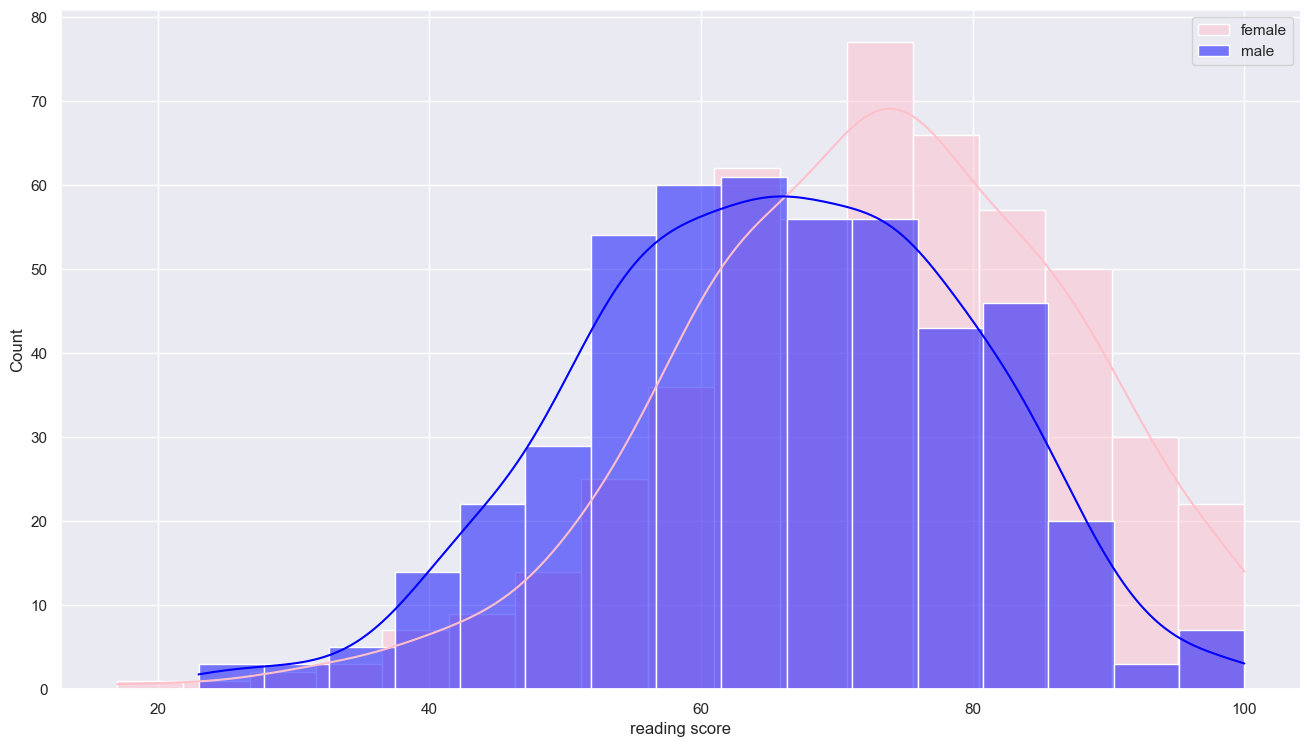

In [186]:
sns.set(style='darkgrid')
sns.histplot(data=female,x="reading score",color="pink",label="female",kde=True)
sns.histplot(data=male,x="reading score",color="blue",label="male",kde=True)
plt.legend()
plt.show()

In [187]:
bins = [0, 60, 75, 85,100]
gen_writing_df = df[['gender','writing score']].copy()
gen_writing_df['ThangDiem'] = pd.cut(gen_writing_df['writing score'],bins,labels=['D','C','B','A'])
gen_writing_df.sample(10)

,gender,writing score,ThangDiem
598,female,73,C
478,female,70,C
591,male,50,D
339,female,60,D
100,male,67,C
371,female,70,C
216,female,88,A
884,female,54,D
253,male,72,C
141,female,64,C


In [188]:
tanso_df = pd.crosstab(index=gen_writing_df['gender'],columns=gen_writing_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
gender,,,,
female,100,187,137,94
male,201,184,70,27


In [189]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến gender và ThangDiem
- **H0**: Giới tính và điểm writing không phụ thuộc vào nhau
- **H1**: Giới tính và điểm writing có mối liên hệ với nhau.

In [190]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,91.522401,1.031660e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, giới tính  có ảnh hưởng đến điểm writing ở mức ý nghĩa 5%

In [191]:
female = gen_writing_df[gen_writing_df['gender']=='female']
male = gen_writing_df[gen_writing_df['gender']=='male']


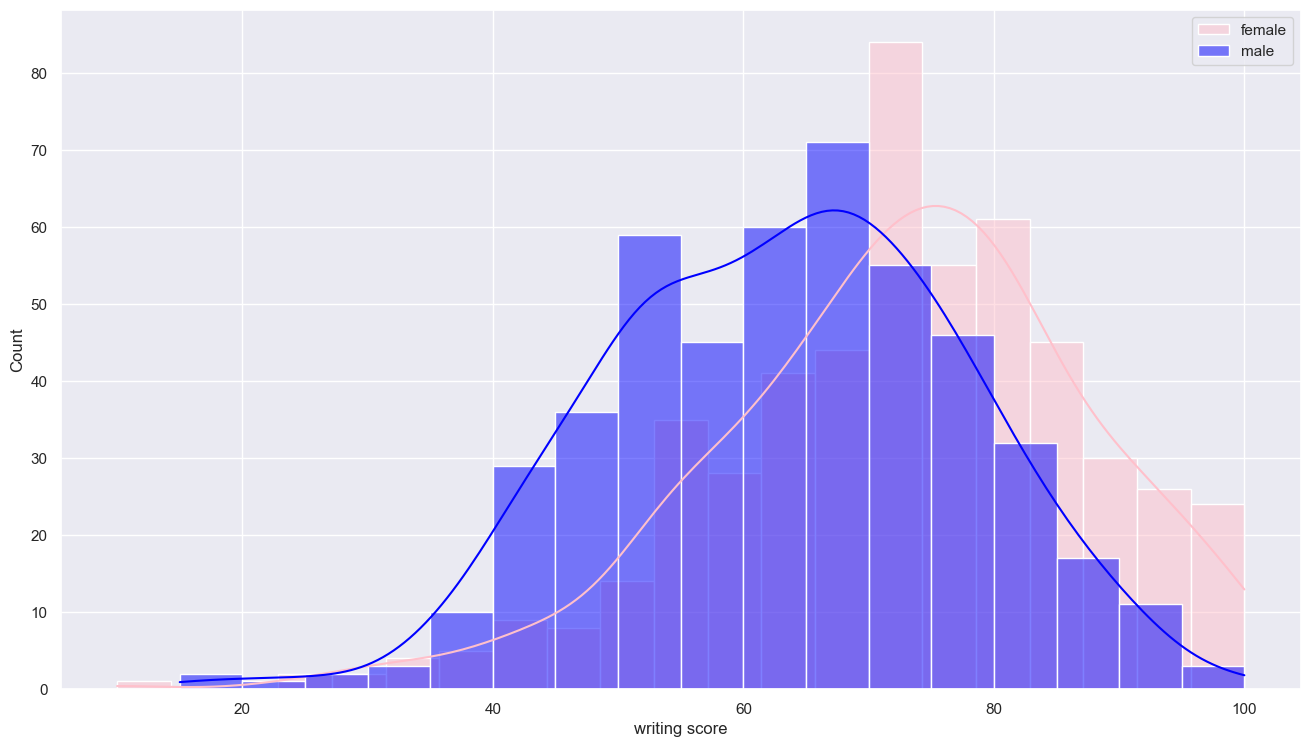

In [192]:
sns.set(style='darkgrid')
sns.histplot(data=female,x="writing score",color="pink",label="female",kde=True)
sns.histplot(data=male,x="writing score",color="blue",label="male",kde=True)
plt.legend()
plt.show()

In [193]:
bins = [0, 60, 75, 85,100]
lun_math_df = df[['lunch','math score']].copy()
lun_math_df['ThangDiem'] = pd.cut(lun_math_df['math score'],bins,labels=['D','C','B','A'])
lun_math_df.sample(10)

,lunch,math score,ThangDiem
858,standard,52,D
955,standard,72,C
437,free/reduced,75,C
180,free/reduced,62,C
988,free/reduced,44,D
739,free/reduced,61,C
941,standard,78,B
109,standard,70,C
953,standard,58,D
977,standard,62,C


In [194]:
tanso_df = pd.crosstab(index=lun_math_df['lunch'],columns=lun_math_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,181,124,37,12
standard,157,263,134,91


In [195]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm math không phụ thuộc vào nhau
- **H1**: lunch và điểm math có mối liên hệ với nhau.

In [196]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,90.126341,2.057882e-19,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch có ảnh hưởng đến điểm môn toán ở mức ý nghĩa 5%

In [197]:
free_or_reduced = lun_math_df[lun_math_df['lunch']=='free/reduced']
standard = lun_math_df[lun_math_df['lunch']=='standard']


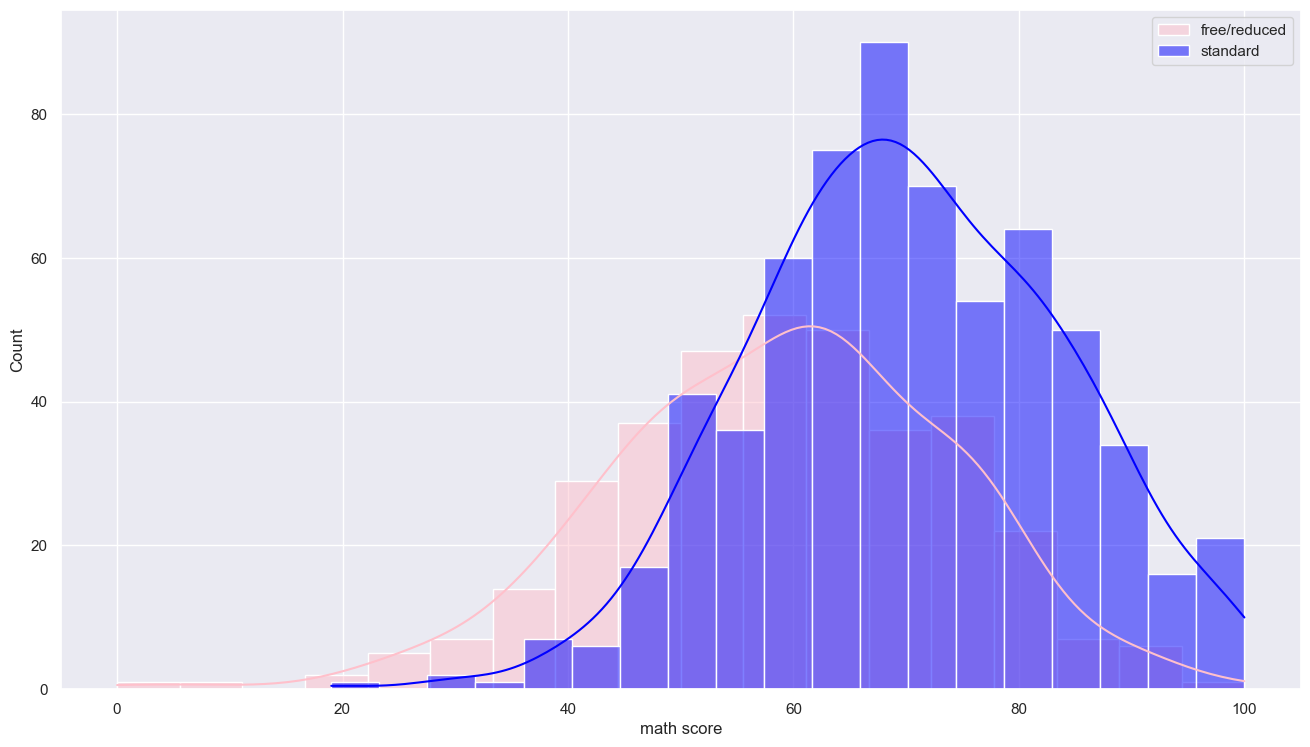

In [198]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="math score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="math score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

In [199]:
bins = [0, 60, 75, 85,100]
lun_reading_df = df[['lunch','reading score']].copy()
lun_reading_df['ThangDiem'] = pd.cut(lun_reading_df['reading score'],bins,labels=['D','C','B','A'])
lun_reading_df.sample(10)

,lunch,reading score,ThangDiem
310,standard,76,B
72,free/reduced,51,D
60,free/reduced,74,C
628,free/reduced,57,D
797,free/reduced,84,B
770,standard,48,D
261,standard,79,B
713,standard,81,B
146,standard,84,B
643,standard,79,B


In [200]:
tanso_df = pd.crosstab(index=lun_reading_df['lunch'],columns=lun_reading_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,139,130,56,30
standard,136,251,156,102


In [201]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm reading không phụ thuộc vào nhau
- **H1**: lunch và điểm reading có mối liên hệ với nhau.

In [202]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,44.549719,1.153330e-09,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch  có ảnh hưởng đến điểm reading ở mức ý nghĩa 5%

In [203]:
free_or_reduced = lun_reading_df[lun_reading_df['lunch']=='free/reduced']
standard = lun_reading_df[lun_reading_df['lunch']=='standard']


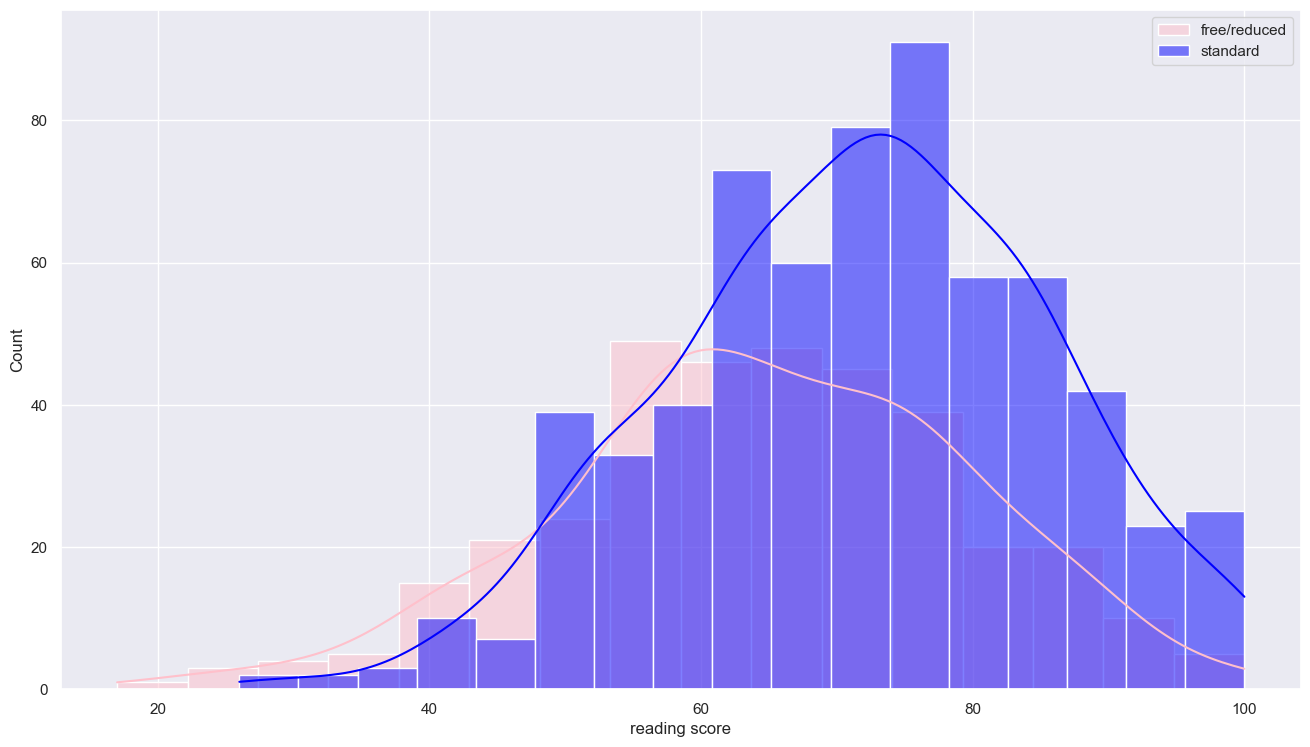

In [204]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="reading score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="reading score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

In [205]:
bins = [0, 60, 75, 85,100]
lun_writing_df = df[['lunch','writing score']].copy()
lun_writing_df['ThangDiem'] = pd.cut(lun_writing_df['writing score'],bins,labels=['D','C','B','A'])
lun_writing_df.sample(10)

,lunch,writing score,ThangDiem
725,standard,71,C
144,standard,78,B
475,standard,83,B
942,standard,64,C
275,standard,73,C
404,standard,62,C
880,standard,66,C
727,standard,57,D
740,standard,72,C
895,free/reduced,38,D


In [206]:
tanso_df = pd.crosstab(index=lun_writing_df['lunch'],columns=lun_writing_df['ThangDiem'])
tanso_df

ThangDiem,D,C,B,A
lunch,,,,
free/reduced,156,120,56,23
standard,145,251,151,98


In [207]:
score, p_value, dof, expected = stats.chi2_contingency(tanso_df)

## So sánh hai biến lunch và ThangDiem
- **H0**: lunch và điểm writing không phụ thuộc vào nhau
- **H1**: lunch và điểm writing có mối liên hệ với nhau.

In [208]:
p = {}
p['score']= score
p['p_value'] = p_value
p['dof']= dof
results(p)

,score,p_value,dof,KetLuan
,57.47865,2.031098e-12,3,Chấp nhận H1 với mức ý nghĩa 0.05


Về mặt thống kê, lunch có ảnh hưởng đến điểm writing ở mức ý nghĩa 5%

In [209]:
free_or_reduced = lun_writing_df[lun_writing_df['lunch']=='free/reduced']
standard = lun_writing_df[lun_writing_df['lunch']=='standard']


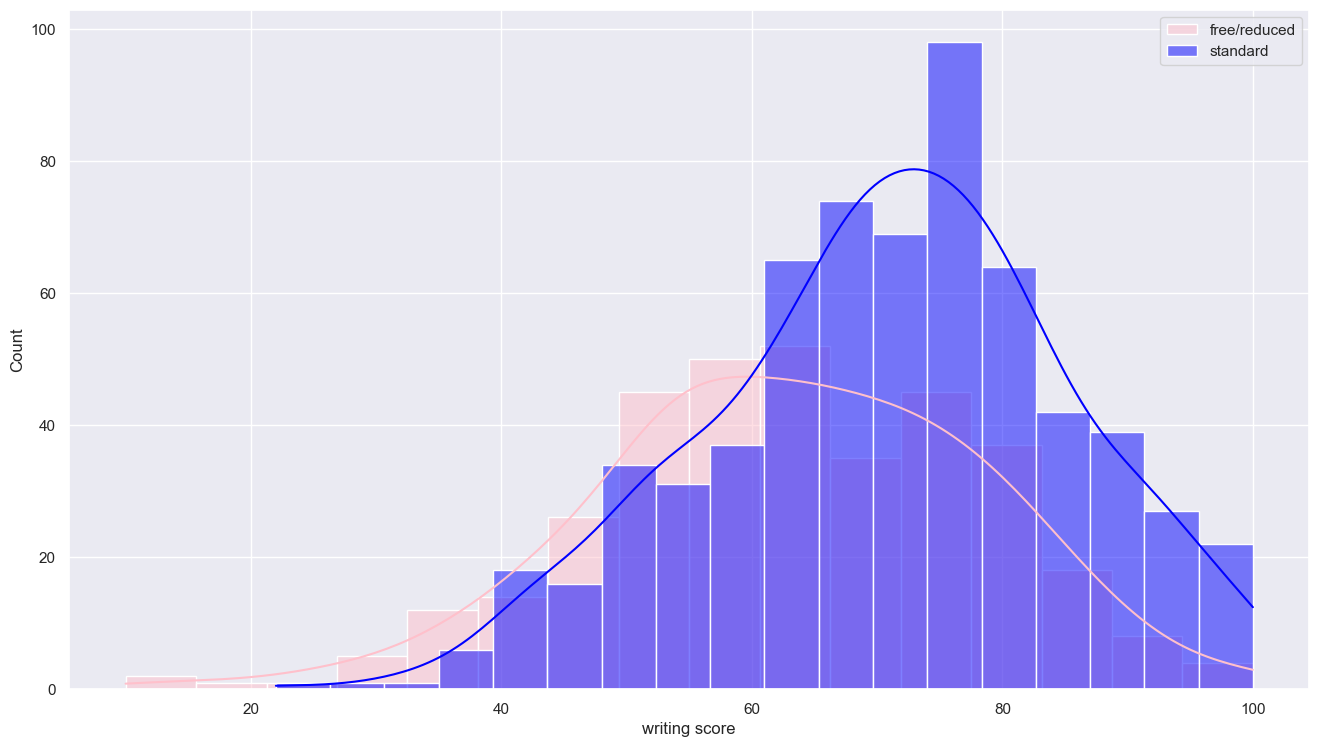

In [210]:
sns.set(style='darkgrid')
sns.histplot(data=free_or_reduced,x="writing score",color="pink",label="free/reduced",kde=True)
sns.histplot(data=standard,x="writing score",color="blue",label="standard",kde=True)
plt.legend()
plt.show()

## Baitap2

In [211]:
def result(p, alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

## So sánh mối quan hệ giữa race và chol
- **H0** : Không có mỗi liên hệ giữa race và chol
- **H1** : có mỗi liên hệ giữa race và chol

In [212]:
cl_df = pd.io.stata.read_stata('https://www.stata-press.com/data/r17/cholesterol.dta')

In [213]:
cl_df.sample(10)

,race,agegrp,chol,agemidpt,meangrp
63,Black,60–79,224.178284,70.0,220.615295
49,Black,40–59,204.338776,50.0,210.003769
16,Other,20–29,179.689636,25.0,188.056671
36,White,30–39,195.698364,35.0,201.394150
68,White,60–79,210.616272,70.0,220.615295
12,Black,10–19,170.780914,15.0,179.853088
32,Other,30–39,207.087860,35.0,201.394150
50,Other,40–59,200.406403,50.0,210.003769
19,Black,20–29,196.190964,25.0,188.056671
70,Black,60–79,208.904495,70.0,220.615295


In [214]:
bl = []
wh = []
ot = []

n = len(cl_df['race'])
for i in range(n) :
    if (cl_df['race'][i] == 'Black'):
        bl.append(cl_df['chol'][i])
    else:
        if (cl_df['race'][i] == 'White'):
            wh.append(cl_df['chol'][i])
        else:
            ot.append(cl_df['chol'][i])
race = {'Black': bl,
        'White': wh,
        'Other' : ot
        }

df = pd.DataFrame(race, columns = ['Black', 'White', 'Other'])
df.sample(10)


,Black,White,Other
16,196.312515,199.308807,200.406403
18,233.787735,216.132538,202.265930
12,205.170563,195.698364,193.706329
23,208.904495,196.742615,218.110077
6,203.053589,201.929932,182.051834
11,220.507324,187.386658,196.922867
22,220.085693,213.022552,221.486923
10,199.768616,196.303391,207.087860
3,187.074249,165.221497,174.505630
20,224.178284,221.642242,236.831116


In [215]:
df_melt = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['Black', 'White', 'Other'])
df_melt.columns = ['id', 'race', 'chol']

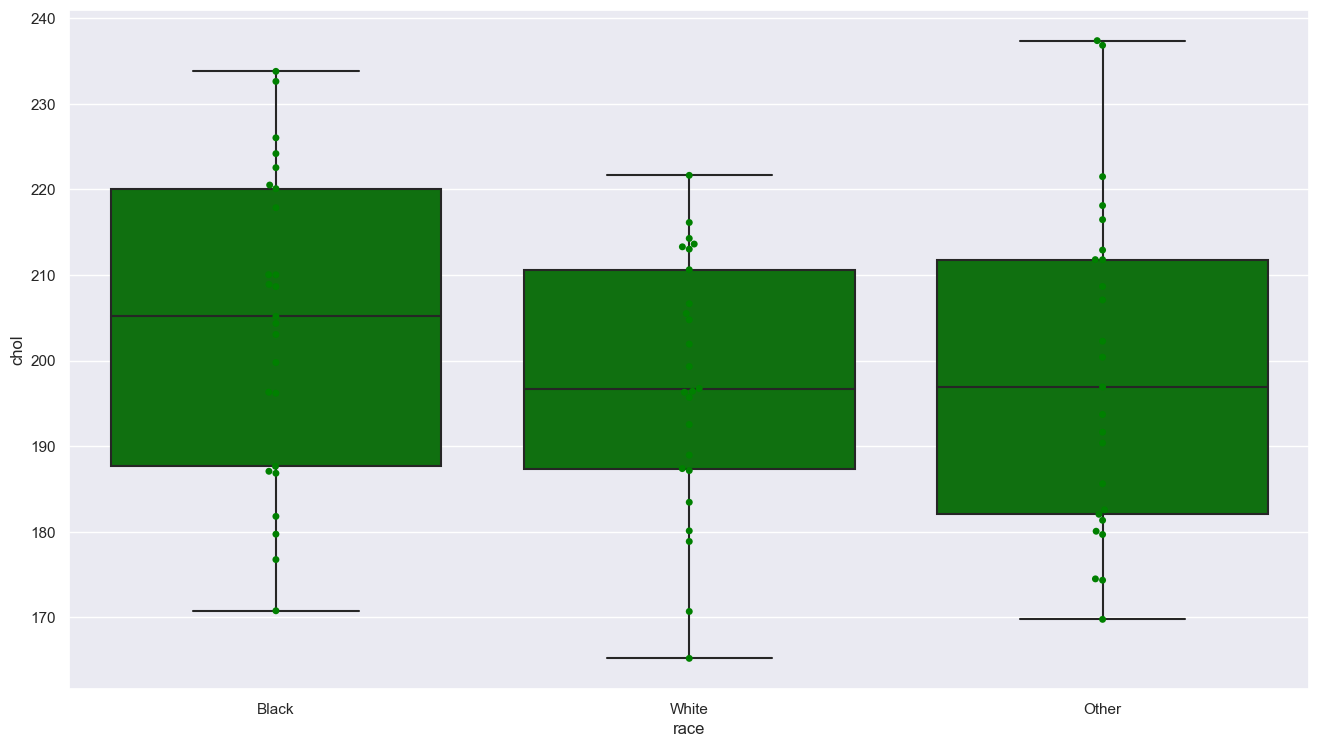

In [216]:
sns.boxplot(x='race',y='chol',data = df_melt,color='green')
sns.swarmplot(x='race',y='chol',data=df_melt,color='green')
plt.show()

## Kiểm định dữ liệu có tuân theo phân phối chuẩn không?


In [217]:
st1, p1 = stats.shapiro(df['Black'])
st2, p2 = stats.shapiro(df['White'])
st3, p3 = stats.shapiro(df["Other"])

Xây dựng giả thuyết
$$H_{0}: \text{Black là dữ liệu phân phối chuẩn}$$
$$H_{1}: \text{Black không phải là dữ liệu phân phối chuẩn}$$

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


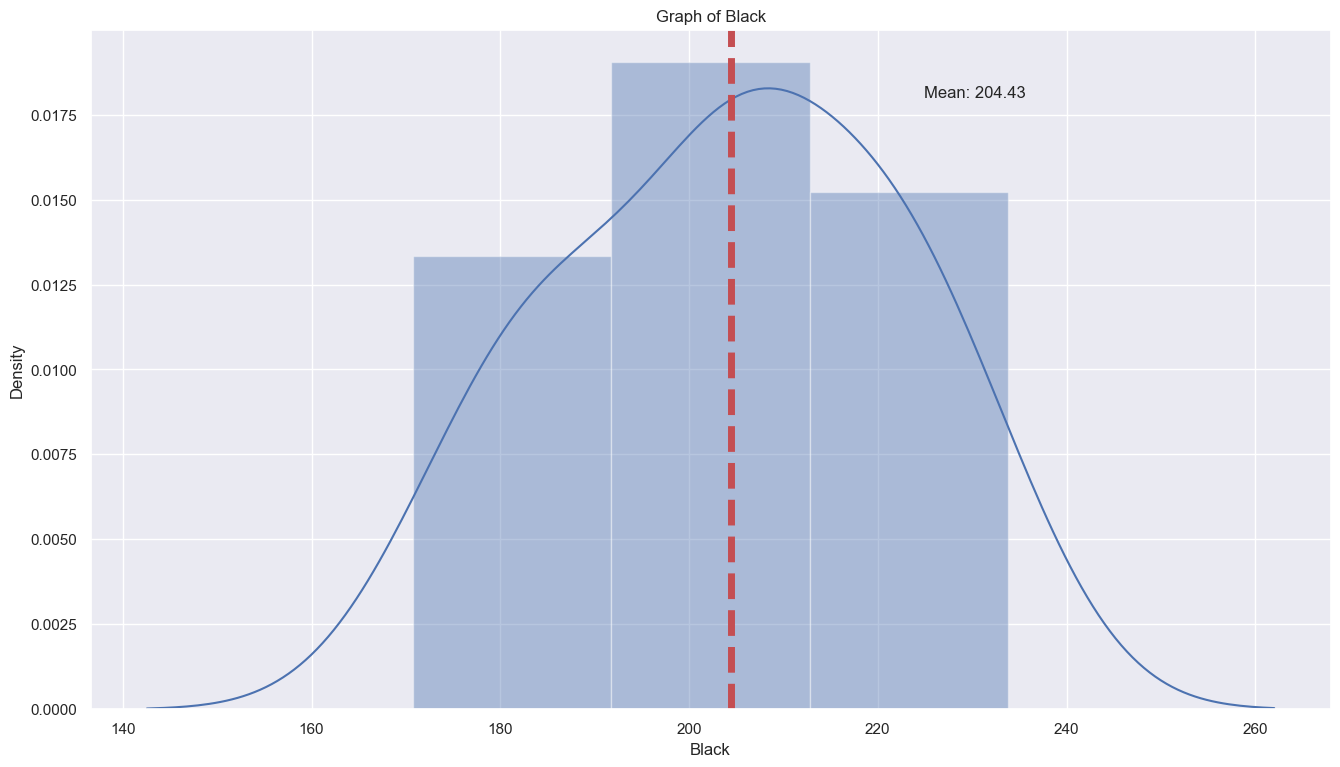

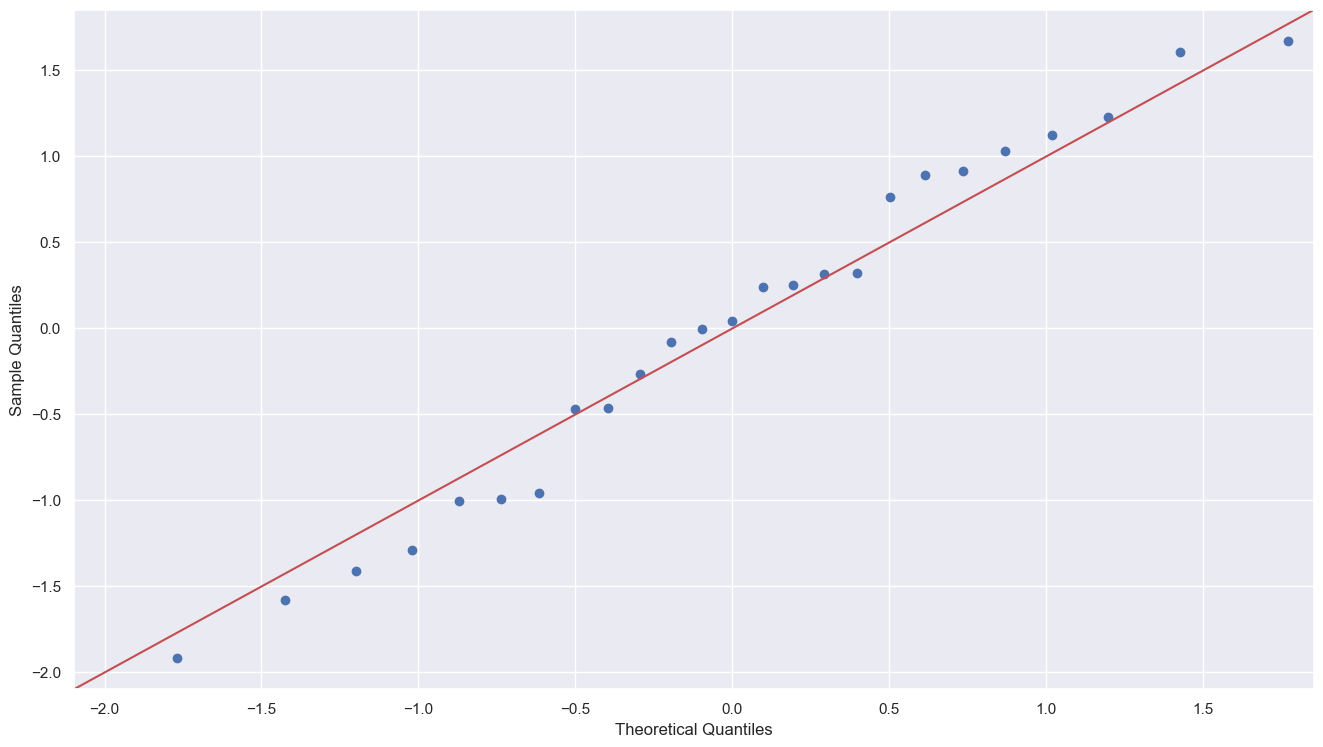

In [218]:
hist(df['Black'])
plt.title('Graph of Black')
#qq
sm.qqplot(standadize(df['Black']), line ='45')
plt.show()



In [219]:
p = {}
p['score'], p['p_value'] = stats.shapiro(df["Black"])
result(p)

,score,p_value,KetLuan
,0.967548,0.583728,Chấp nhận H0 với mức ý nghĩa 0.05


Xây dựng giả thuyết
$$H_{0}: \text{White là dữ liệu phân phối chuẩn}$$
$$H_{1}: \text{White không phải là dữ liệu phân phối chuẩn}$$

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


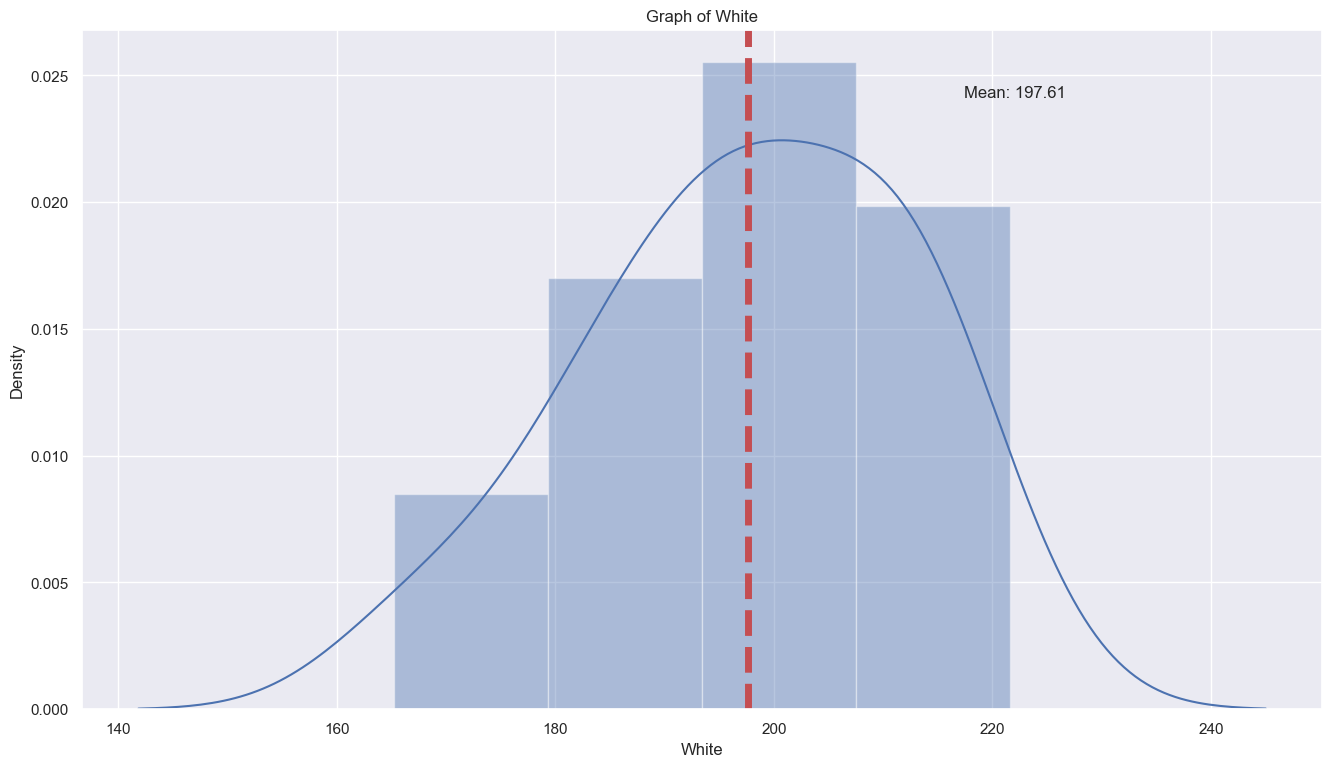

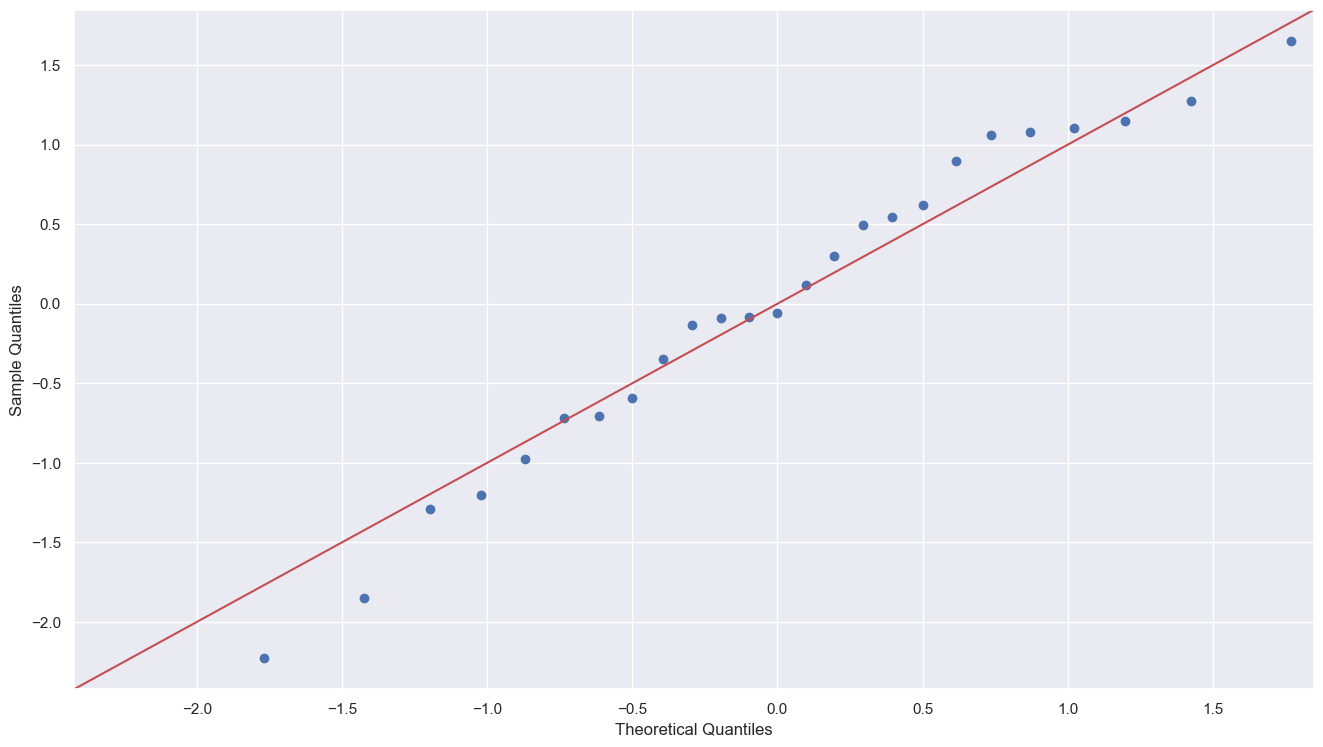

In [220]:
hist(df['White'])
plt.title('Graph of White')
#qq
sm.qqplot(standadize(df['White']), line ='45')
plt.show()


In [221]:
p = {}
p['score'], p['p_value'] = stats.shapiro(df["White"])
result(p)

,score,p_value,KetLuan
,0.967422,0.580625,Chấp nhận H0 với mức ý nghĩa 0.05


Xây dựng giả thuyết
$$H_{0}: \text{Other là dữ liệu phân phối chuẩn}$$
$$H_{1}: \text{Other không phải là dữ liệu phân phối chuẩn}$$

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


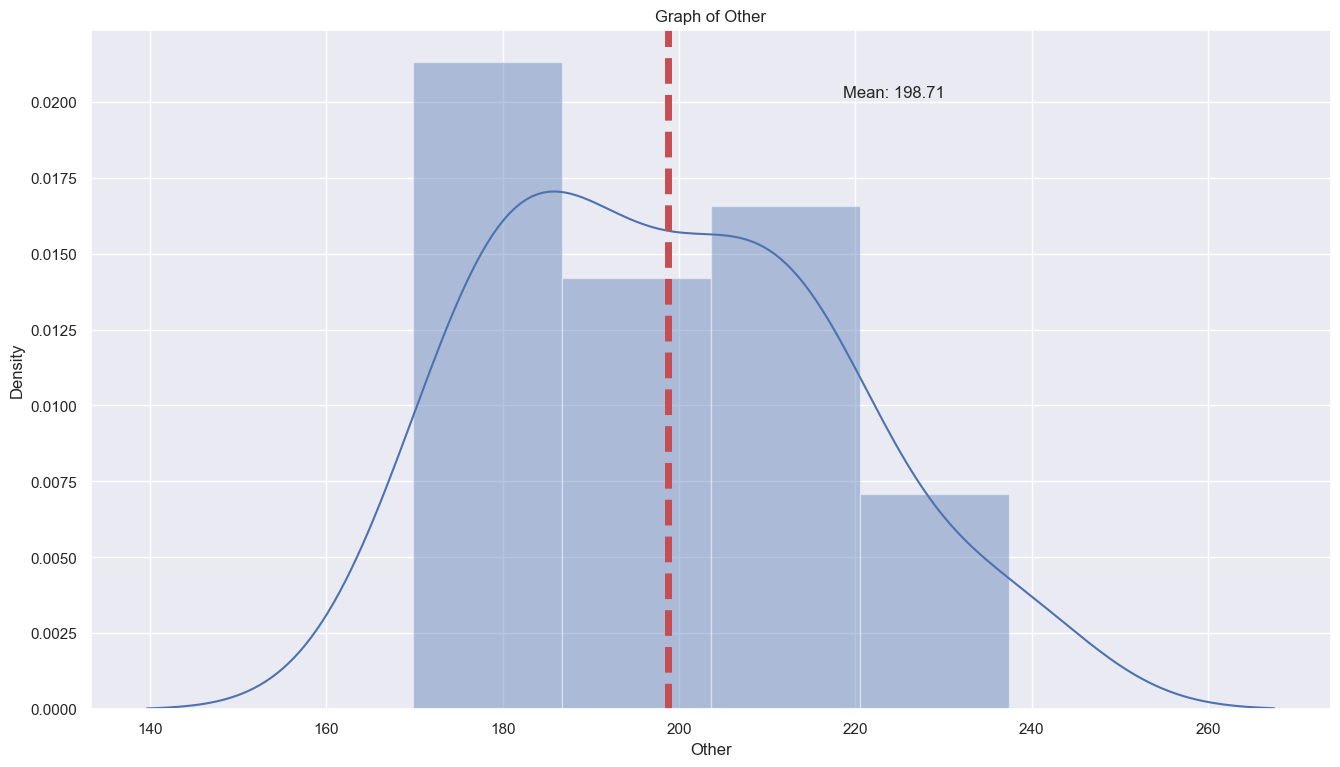

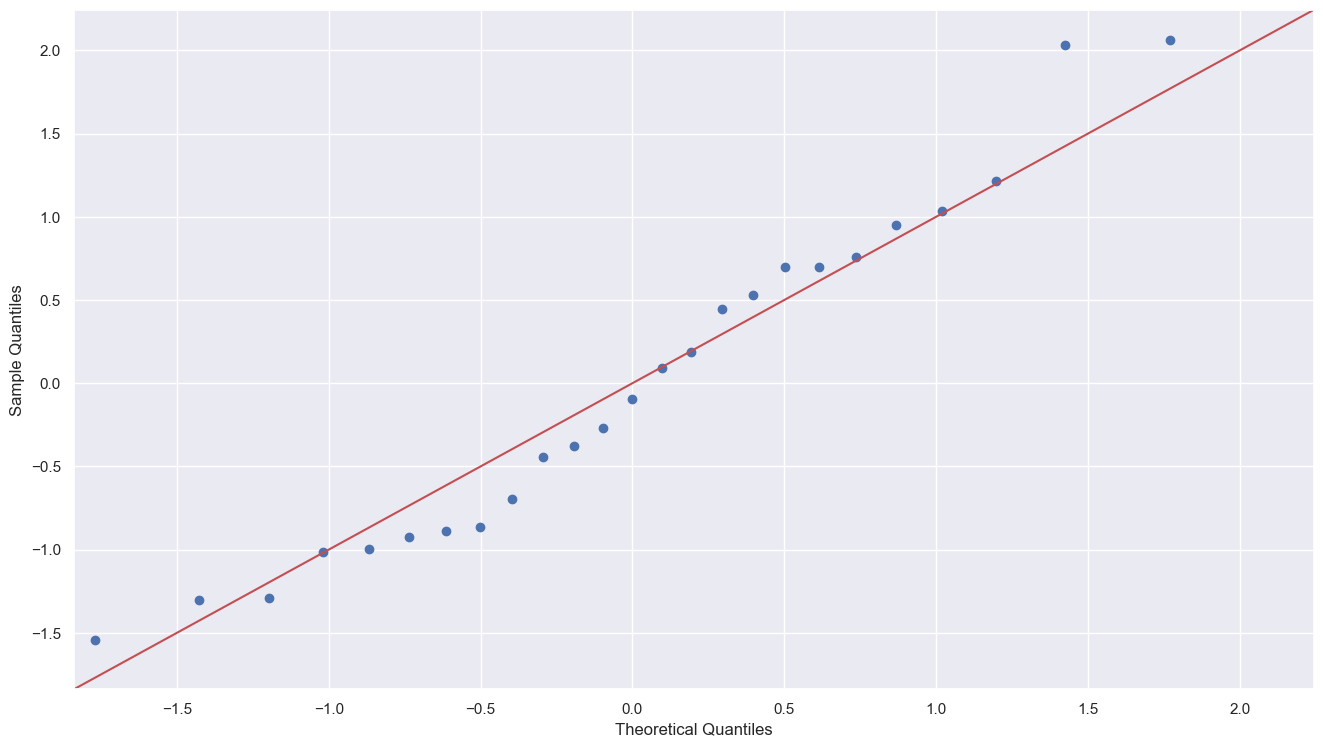

In [222]:
hist(df['Other'])
plt.title('Graph of Other')
#qq
sm.qqplot(standadize(df['Other']), line ='45')
plt.show()

In [223]:
p = {}
p['score'], p['p_value'] = stats.shapiro(df["Other"])
result(p)

,score,p_value,KetLuan
,0.952129,0.279862,Chấp nhận H0 với mức ý nghĩa 0.05


## Kiểm định sự đồng nhất phương sai giữa 3 mẫu: Black, White, Other

Xây dựng giả thuyết:
$$H_{0}: \text{Các mẫu Black, White, Other có phương sai bằng nhau }$$
$$H_{1}: \text{Có sự khác biệt về phương sai giữa các mẫu Black, White, Other}$$

In [224]:
p['score'], p['p_value'] = stats.bartlett(df['Black'], df['White'], df['Other'])
result(p)

,score,p_value,KetLuan
,1.571554,0.455765,Chấp nhận H0 với mức ý nghĩa 0.05


Xây dựng giả thuyết:
$$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$$
$$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$$

In [225]:
p={}
p['score'], p['p_value'] = stats.f_oneway(df['Black'],df['White'],df['Other'])
result(p)

,score,p_value,KetLuan
,1.108161,0.33573,Chấp nhận H0 với mức ý nghĩa 0.05


## Bởi kết quả của kiểm định Anova one way ta chấp nhận H0 nên bỏ qua bước hậu nghiệm, trực tiếp kiểm tra điều kiện của Anova

## Kiểm tra các điều kiện cho kiểm định Anova

In [226]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [227]:
model = ols('chol ~ C(race)', data = df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)

In [228]:
anova_table

,sum_sq,df,F,PR(>F)
C(race),669.278235,2.0,1.108161,0.33573
Residual,21742.341205,72.0,NaN,NaN


## test ANOVA assumptions

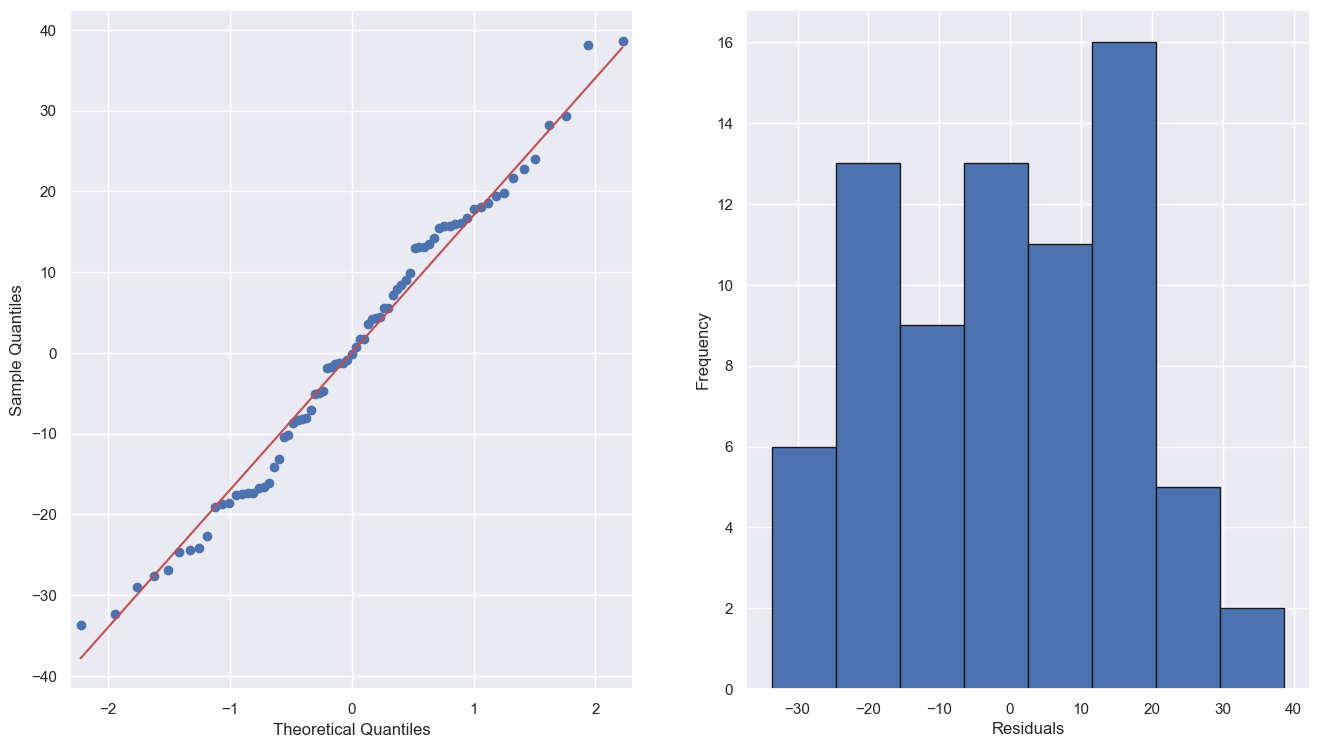

In [229]:
fig, ax = plt.subplots(1, 2)
sm.qqplot(model.resid, line = 's', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins = 'auto', histtype = 'bar', ec = 'k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()